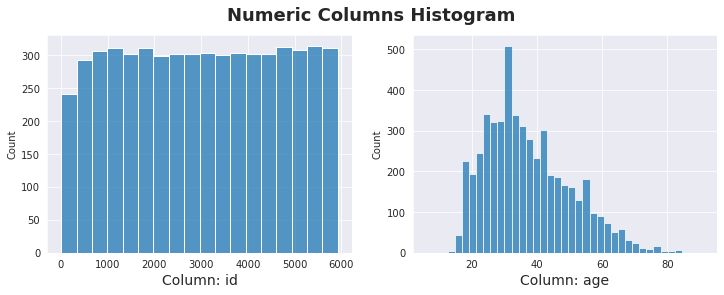

In [65]:
plotter(numeric_cols, 'Numeric Columns Histogram', sns, 'histplot')

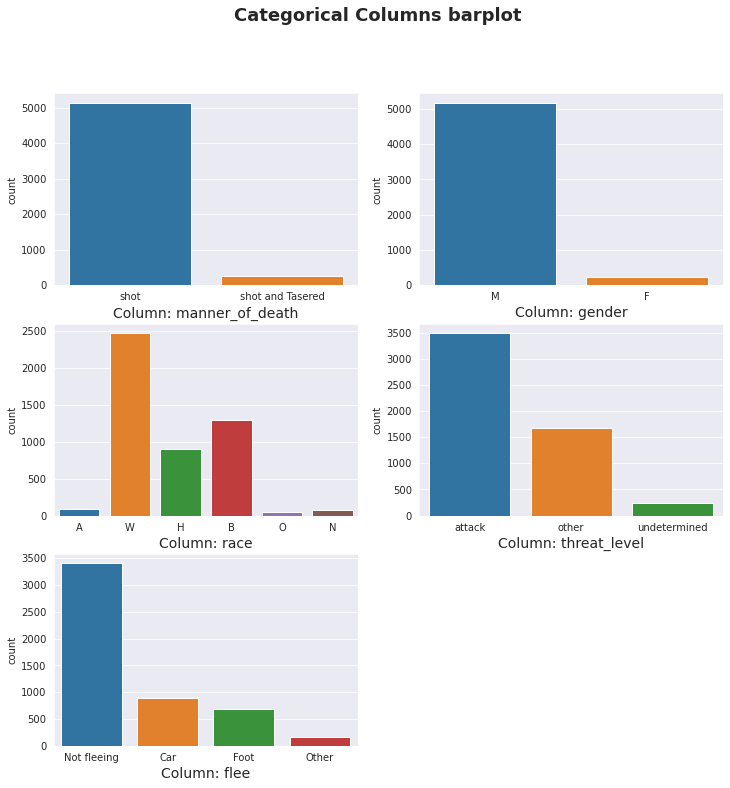

In [66]:
plotter(object_cols, 'Categorical Columns barplot', sns, 'countplot')

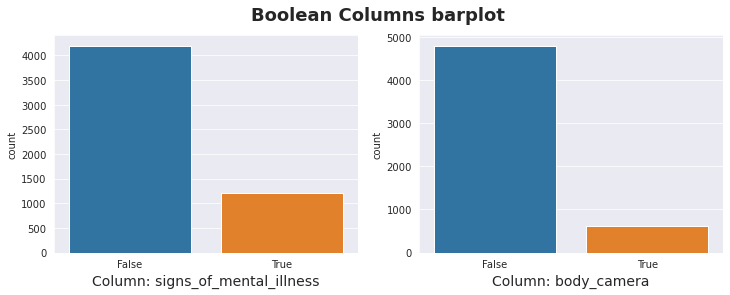

In [69]:
plotter(bool_cols, 'Boolean Columns barplot', sns, 'countplot')